### TIME SERIES

Time series models are statistical models used to analyze and forecast data points collected over time. These models are designed specifically for datasets where observations are recorded at regular intervals, such as hourly, daily, monthly, or yearly. Time series models aim to capture the patterns, trends, and seasonality present in the data to make predictions about future values or understand the underlying dynamics of the process generating the data.

##### Time Series Models: 
Several models are used to forecast future values of a time series based on past observations. 

##### Common models include:

* Autoregressive (AR) models
* Moving Average (MA) models
* Autoregressive Integrated Moving Average (ARIMA) models
* Seasonal ARIMA (SARIMA) models
* Vector Autoregression (VAR) models
* Exponential Smoothing State Space Models (ETS)
* Long Short-Term Memory (LSTM) networks (a type of Recurrent Neural Network)
* Prophet (a forecasting tool developed by Facebook)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sales_data=pd.read_csv('train.csv')

C:\Users\pooji\AppData\Local\Temp\ipykernel_10528\255843651.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data=pd.read_csv('train.csv')


In [4]:
sales_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
sales_data['Date']=pd.to_datetime(sales_data['Date'])

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [8]:
sales_data.set_index('Date', inplace=True)

In [9]:
sales_data.drop(['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday'], axis=1,inplace=True)

In [10]:
sales_data.isnull().sum()

Sales    0
dtype: int64

In [11]:
sales_data=sales_data.resample('D').sum()

In [12]:
sales_data

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


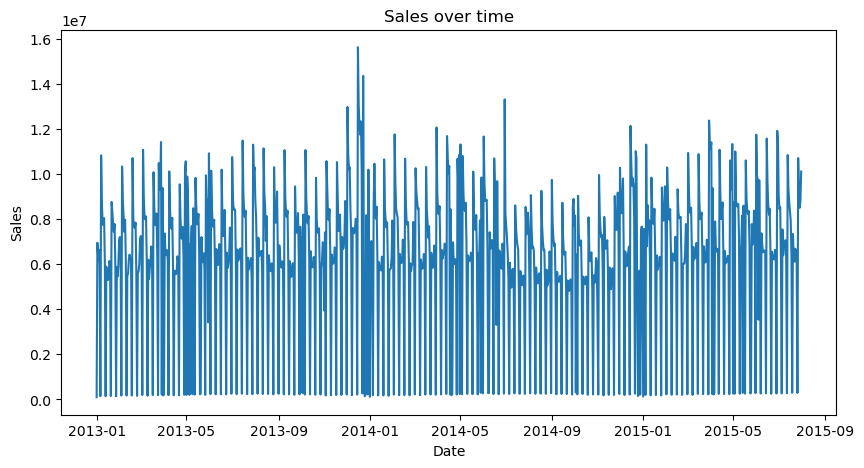

In [13]:
plt.figure(figsize=(10,5))
plt.plot(sales_data)
plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Autoregressive Integrated Moving Average (ARIMA) Model*

* ARIMA is a combination of autoregressive (AR), differencing (I), and moving average (MA) models. It is capable of handling non-stationary time series data by differencing the data to make it stationary before applying AR and MA components.
*  ARIMA models are versatile and widely used for time series forecasting, especially when the data exhibits trends and seasonality. They can handle a wide range of time series patterns and are relatively easy to interpret.


#### Dickey Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(sales_data['Sales'])

ADF Statistic: -4.7616145245956165
p-value: 6.436731330559263e-05
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


#### *Analysis*

* *ADF Statistic:* This is the test statistic from the ADF test. In this case, it is -4.7616. This statistic is used to assess the stationarity of the time series. The more negative this statistic, the stronger the evidence against the null hypothesis (the null hypothesis being that the time series is non-stationary).

* *p-value:* This is the p-value associated with the null hypothesis in the ADF test. It is the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming the null hypothesis is true. In this case, the p-value is very small (6.4367e-05 or approximately 0.00006), which suggests strong evidence against the null hypothesis. Typically, if the p-value is less than a chosen significance level (e.g., 0.05), the null hypothesis is rejected in favor of the alternative hypothesis, indicating that the time series is stationary.

* *Critical Values:* These are the critical values for the ADF test at various levels of significance (1%, 5%, and 10%). They are used to determine whether to reject the null hypothesis based on the ADF statistic. If the ADF statistic is more negative than the critical value at a chosen significance level, the null hypothesis is rejected.

* In summary, since the p-value is very small (less than 0.05) and the ADF statistic is more negative than the critical values at all levels of significance, we can reject the null hypothesis and conclude that the time series is likely stationary. This indicates that differencing may not be necessary for this time series in order to apply an ARIMA model.

#### Plot for Auto Correlation and Partial Auto Correlation

c:\Users\pooji\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


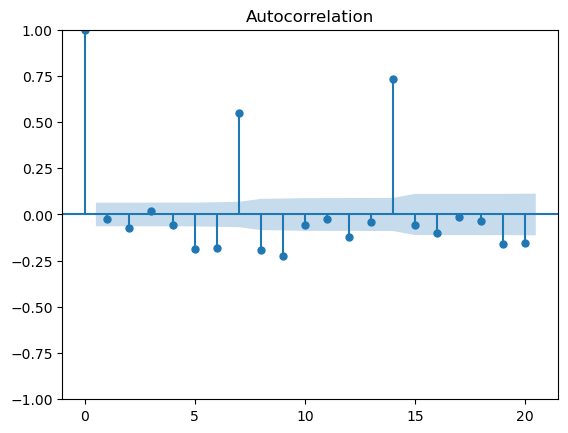

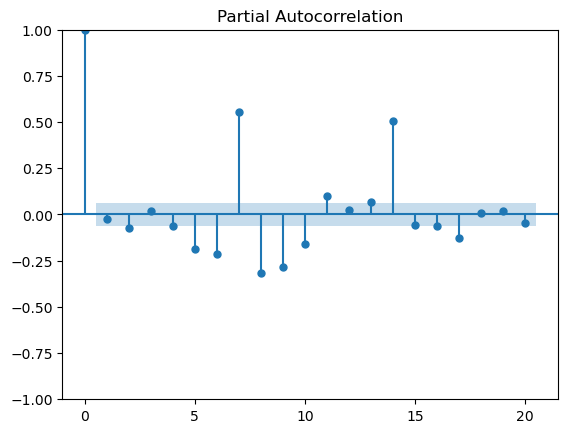

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(sales_data, lags=20)
plot_pacf(sales_data, lags=20)
plt.show()

#### *Analysis*

* *Autoregressive (AR) Component (p):* The order of the AR component is suggested to be 7, based on significant autocorrelation at lag 7 from the ACF plot.

* *Differencing (d):* Since the data is already stationary, differencing may not be required (d=0).

* *Moving Average (MA) Component (q):* The order of the MA component can be determined based on the significant autocorrelation at the lag beyond which it cuts off in the ACF plot. In this case, there's no significant autocorrelation beyond lag 7, suggesting q may not be necessary.

In [16]:
from statsmodels.tsa.arima.model import ARIMA
# Define the model
p = 7  # autoregressive order
d = 0  # differencing order
q = 0  # moving average order

model = ARIMA(sales_data, order=(p, d, q))  # replace p, d, q with appropriate values

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  942
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -15210.961
Date:                Wed, 28 Feb 2024   AIC                          30439.922
Time:                        23:11:37   BIC                          30483.554
Sample:                    01-01-2013   HQIC                         30456.553
                         - 07-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.235e+06   1.19e+05     52.486      0.000       6e+06    6.47e+06
ar.L1          0.0387      0.019      2.038      0.042       0.001       0.076
ar.L2          0.0237      0.026      0.902      0.3

#### *Analysis*

*Model Coefficients:*

* *Constant (Const):* The constant term in the model represents the intercept. In this case, the estimated constant is approximately 6.235*10^6
* *AR Terms (ar.L1 to ar.L7):* These are the autoregressive coefficients corresponding to the lagged values of the dependent variable (Sales). The coefficients indicate the strength and direction of the relationship between the current value and its past values. For instance, the coefficient for AR(7) is 0.5548, indicating a positive relationship with the sales values at lag 7.

*Model Diagnostics:*

* *Log Likelihood:* This is the log-likelihood value of the model, which is used for model comparison. A higher log-likelihood suggests a better fit.
AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), HQIC (Hannan-Quinn Information Criterion): These are information criteria used for model selection. Lower values indicate a better fit.

* *Ljung-Box (Q):* This test statistic assesses the autocorrelation of the residuals. A significant p-value (below a chosen significance level) suggests that the residuals are not independent, indicating a lack of fit.

* *Jarque-Bera (JB):* This test assesses the normality of the residuals. A significant p-value suggests that the residuals are not normally distributed.

* *Heteroskedasticity (H):* This assesses whether the variance of the residuals is constant over time. A value close to 1 suggests homoscedasticity.

#### *Conclusion*

* The ARIMA(7, 0, 0) model appears to provide a reasonable fit to the sales data, as indicated by the significant coefficients for the autoregressive terms and the constant term.
* However, there are some concerns regarding the model's performance. The high condition number and singularity/near-singularity of the covariance matrix suggest potential instability in the standard errors of the coefficients.
* Additionally, the significant p-value in the Ljung-Box test and Jarque-Bera test indicate that the model's residuals may not be entirely satisfactory. 
* In summary, while the ARIMA(7, 0, 0) model provides a starting point for modeling the sales data, further evaluation and potentially model refinement are warranted to ensure robustness and reliability in forecasting sales.

#### Plot for Observed and Fitted Values

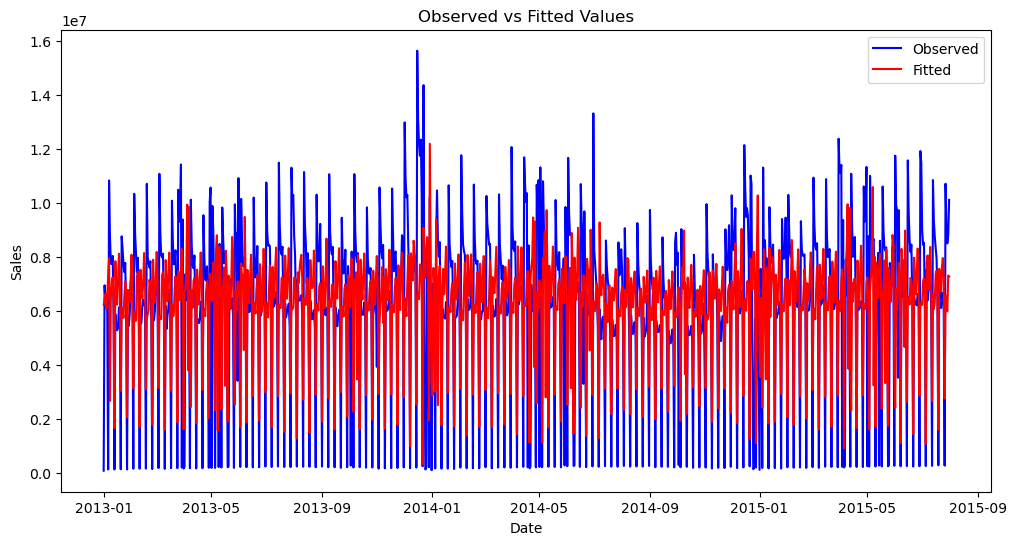

In [17]:
# Plot observed sales data
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Sales'], label='Observed', color='blue')

# Plot fitted values
plt.plot(sales_data.index, model_fit.fittedvalues, label='Fitted', color='red')

plt.title('Observed vs Fitted Values')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### *Analysis*

* Overall Trend: Both the observed and fitted values show an overall trend in sales over time. The observed sales data exhibit fluctuations and trends, while the fitted values attempt to capture and reproduce these patterns based on the ARIMA model.

* Model Performance: The comparison between observed and fitted values provides insights into the performance of the ARIMA model. If the fitted values closely match the observed data, it suggests that the model is effectively capturing the underlying patterns and trends in the sales data.

* Evaluation of January 2014 Sales: To evaluate the performance of the model in capturing sales exceeding 1.5 in January 2014, we can visually inspect the plot around that period. If the observed sales exceed the threshold while the fitted values follow a similar pattern, it indicates that the model successfully captures this aspect of the data.

#### *Conclusion*

* The plot of observed versus fitted values provides a visual assessment of the ARIMA model's performance in capturing the sales data's underlying patterns and trends.
* By comparing observed and fitted values, we can evaluate how well the model fits the data and identify areas where the model may need improvement.
* Further analysis, including diagnostic checks of the model residuals and evaluation of forecast accuracy, can provide additional insights into the model's performance and potential areas for refinement.

#### Forecast

In [18]:
# Forecast
forecast = model_fit.forecast(steps=30)

# Print the forecast
print(forecast)

2015-08-01    6.554092e+06
2015-08-02    1.773245e+06
2015-08-03    7.688154e+06
2015-08-04    6.706772e+06
2015-08-05    6.291363e+06
2015-08-06    7.393954e+06
2015-08-07    8.941181e+06
2015-08-08    7.059559e+06
2015-08-09    3.584862e+06
2015-08-10    6.899416e+06
2015-08-11    6.092260e+06
2015-08-12    5.482060e+06
2015-08-13    6.507563e+06
2015-08-14    7.919460e+06
2015-08-15    7.097836e+06
2015-08-16    4.819781e+06
2015-08-17    6.762048e+06
2015-08-18    6.132641e+06
2015-08-19    5.390510e+06
2015-08-20    6.074649e+06
2015-08-21    7.156720e+06
2015-08-22    6.879543e+06
2015-08-23    5.483340e+06
2015-08-24    6.713086e+06
2015-08-25    6.301874e+06
2015-08-26    5.582186e+06
2015-08-27    5.952377e+06
2015-08-28    6.684236e+06
2015-08-29    6.625299e+06
2015-08-30    5.792131e+06
Freq: D, Name: predicted_mean, dtype: float64


#### Plot for Observed & Forecasted Values

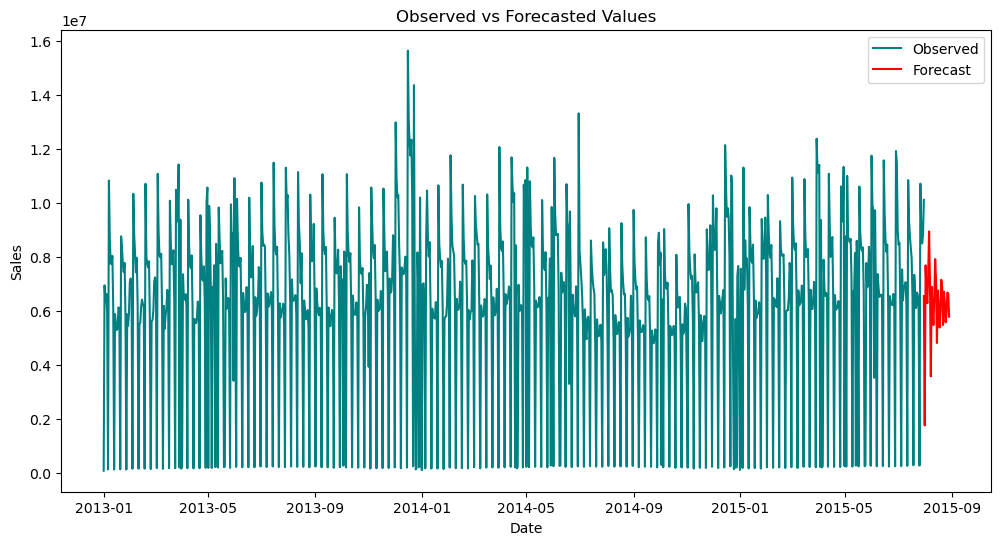

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Sales'], label='Observed', color='teal')

# Plot forecasted values
forecast_index = pd.date_range(start=sales_data.index[-1], periods=30, freq='D')
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('Observed vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### *Interpretation*

* *Actual Sales (Teal Line):* The teal line represents the observed sales data up to the present time, with the most recent data point being at the end of the time series.
* *Forecasted Sales (Red Line):* The red line represents the forecasted sales values for the upcoming 30 days, starting from August 2015. These forecasted values are generated by the ARIMA(7, 0, 0) model based on historical sales data.

#### *Analysis*

* January 2014 Sales: The observed sales in January 2014 appear to be significantly higher compared to other months and years. This spike in sales could be due to various factors such as seasonality, promotional activities, or external influences.
* Forecasted Sales for August 2015: The forecasted sales for August 2015 are shown by the red line. The accuracy of the forecast depends on the reliability of the ARIMA model and the assumption that the underlying patterns in the data will continue into the future.
* Comparison of Actuals and Forecast: By comparing the actual sales data with the forecasted values, we can assess how well the ARIMA model predicts future sales. Any discrepancies between the actuals and forecasted values may indicate areas where the model can be improved or where external factors may be influencing sales.

#### *Conclusion*

* The plot provides a visual comparison between actual and forecasted sales data, allowing us to evaluate the model's predictive performance.
* The spike in sales observed in January 2014 suggests the presence of unique factors during that period that may not be fully captured by the model.
* The forecasted sales for August 2015 provide insights into the expected sales trends in the near future, but it's essential to interpret these forecasts cautiously and consider potential uncertainties or external influences that may affect sales. Further model refinement and validation may be necessary to improve forecast accuracy.

#### Evaluate the Model

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#### Forecast Values for 30 days

In [37]:
actual_values = sales_data['Sales'].values[-30:]  

forecast_values = forecast.values

#### Calculate Metrics

In [38]:
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 3379343.351276866
Mean Squared Error (MSE): 20240009704837.516
Root Mean Squared Error (RMSE): 4498889.830262297
Mean Absolute Percentage Error (MAPE): 392.9069672357464


##### Mean Absolute Error (MAE): 
* The MAE measures the average absolute difference between the actual and predicted values. In this case, it's approximately 3,379,343.35. This indicates, on average, how far off the model's predictions are from the actual values.

##### Mean Squared Error (MSE): 
* The MSE measures the average squared difference between the actual and predicted values. Here, it's approximately 20,240,009,704,837.516. MSE penalizes larger errors more than smaller ones.

##### Root Mean Squared Error (RMSE): 
* The RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors. It's approximately 4,498,889.83 in this case, indicating the typical size of the prediction errors.

##### Mean Absolute Percentage Error (MAPE): 
* The MAPE measures the average percentage difference between the actual and predicted values relative to the actual values. A value of approximately 392.91% suggests that, on average, the model's predictions are off by nearly 393% relative to the actual values.

##### Overall, these metrics provide insights into the accuracy and performance of the ARIMA model. The relatively high values of MAE, MSE, RMSE, and MAPE suggest that the model may not be performing well, and there might be room for improvement in its forecasting accuracy

#### Plot for Actual Vs Forecast Sales values

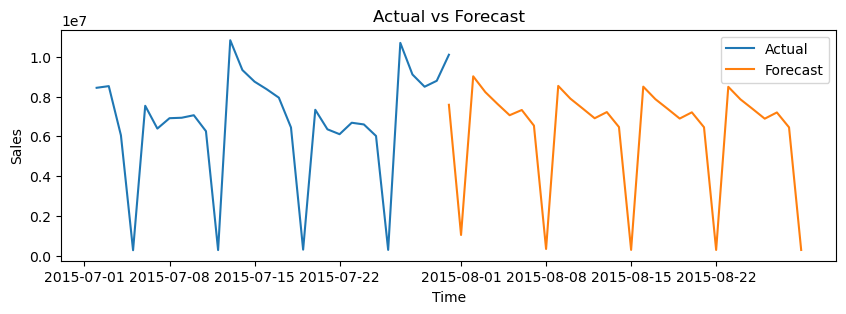

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(sales_data.index[-30:], actual_values, label='Actual')
plt.plot(pd.date_range(start=sales_data.index[-1], periods=30, freq='D'), forecast_values, label='Forecast')
plt.legend()
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

#### *Interpretation*

* Actual Sales (Blue Line): The blue line represents the actual sales values over the specified period.
* Forecasted Sales (Orange Line): The orange line represents the forecasted sales values for the same period.

#### *Analysis*

* High Actual Sales Days (11th and 24th): On the 11th and 24th days, the actual sales values are notably higher than the forecasted values. This discrepancy suggests that the model may have underestimated the sales for these particular days. Potential factors contributing to higher-than-expected sales could include seasonal spikes, promotions, or unforeseen events.
* High Forecasted Sales Day (6th): Conversely, on the 6th day, the forecasted sales value exceeds the actual sales value. This indicates that the model may have overestimated sales for this day. Factors such as changes in consumer behavior or external market influences might have contributed to this discrepancy.

#### *Conclusion*

* The comparison between actual and forecasted sales highlights areas where the model's predictions align well with observed data and where there are discrepancies.
* Analyzing the differences between actual and forecasted values can provide insights into the model's performance and potential areas for improvement.
To enhance forecasting accuracy, it's essential to continually evaluate the model's performance, consider additional factors influencing sales, and adjust the model as necessary.
* Overall, while the model provides valuable insights into future sales trends, it's essential to interpret the forecasts alongside actual data and consider external factors that may impact sales dynamics.

#### Residual Analysis

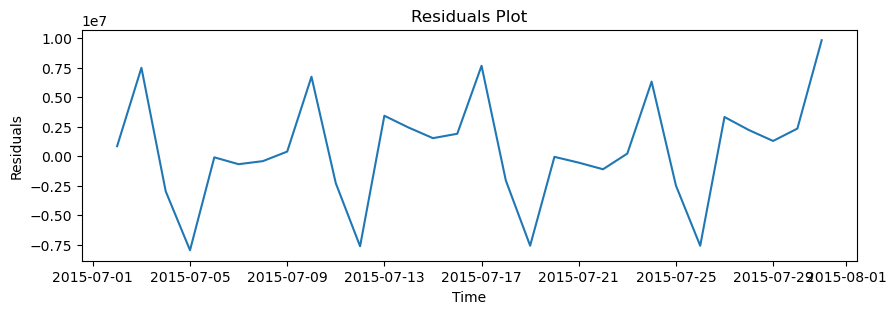

In [41]:
residuals = actual_values - forecast_values.flatten()  

plt.figure(figsize=(10, 3))
plt.plot(sales_data.index[-30:], residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

#### *Interpretation*
The residuals plot provides valuable insights into the performance of the forecasting model. Residuals represent the differences between the actual sales values and the forecasted values. 

* Residuals: The residuals represent the discrepancies between the actual sales values and the forecasted values. Positive residuals indicate that the actual sales were higher than forecasted, while negative residuals indicate that the actual sales were lower than forecasted.

#### *Analysis*

* High Sales Days (3rd 10th, 17th and 24th): On the 3rd 10th, 17th and 24th, there are noticeable peaks in the residuals, indicating significant discrepancies between the actual and forecasted sales values. These peaks align with the observation that sales were high on these particular days, as mentioned.
* Model Performance: The residuals plot helps in identifying specific instances where the model may have underperformed, such as failing to accurately predict high sales days.

#### *Conclusion*
* The residuals plot confirms that there are specific days where the model's predictions deviate significantly from the actual sales values.
* Peaks in the residuals on the 3rd 10th, 17th and 24th days suggest that the model may need further refinement to accurately capture the dynamics of high sales days.
* Analyzing residuals helps in diagnosing the model's strengths and weaknesses and provides valuable insights for improving future forecasts.
* Further investigation into the factors contributing to high sales on these particular days may aid in enhancing the model's accuracy for future predictions.
* In summary, while the residuals plot highlights areas where the model could be improved, it also underscores the importance of continuous evaluation and refinement to enhance forecasting performance.

## Sarima

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

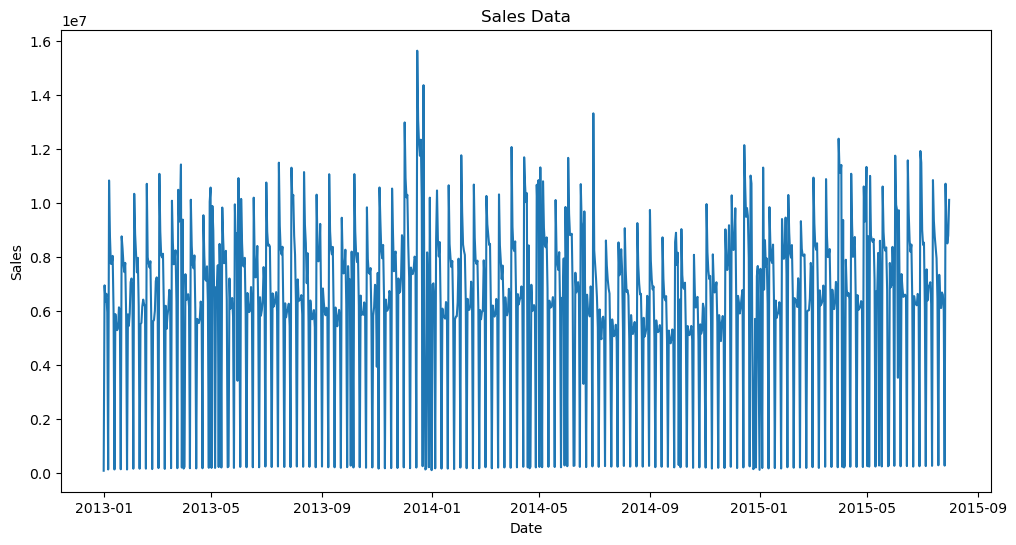

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Sales'])
plt.title('Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [23]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(sales_data, model='additive')
trend = decomposition.trend
seasonal =decomposition.seasonal
residual = decomposition.resid

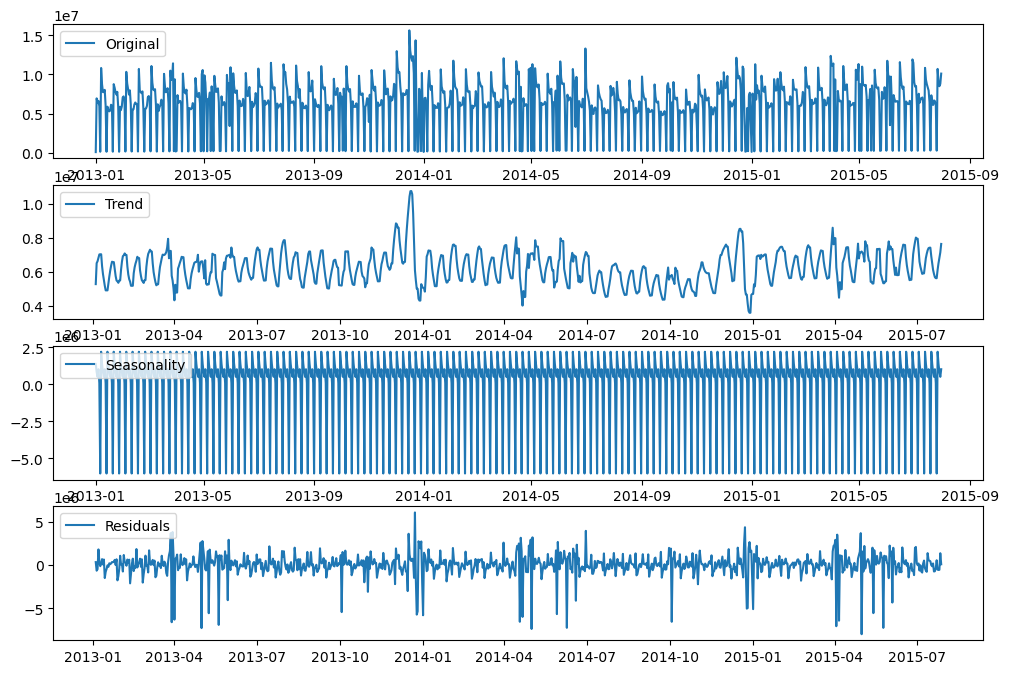

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sales_data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.show()

#### *Interpretation*

*Original Time Series:* The original time series data shows the actual sales over time. In this plot, there seems to be a peak in sales around January 2014.

*Trend Component:* The trend component represents the long-term pattern or direction of the data, ignoring seasonal and irregular fluctuations. Here, the trend suggests an overall increasing pattern in sales over time, with a peak around January 2014, indicating a significant surge in sales during that period.

*Seasonal Component:* The seasonal component captures patterns that repeat at fixed intervals, such as daily, weekly, or monthly cycles. In this plot, the seasonal component shows fluctuations that occur at regular intervals. The peak in January 2014 is also visible in the seasonal component, indicating that January consistently experiences higher sales compared to other months.

*Residuals:* The residual component represents the irregular fluctuations or noise in the data after removing the trend and seasonal components. In this plot, the residuals appear to fluctuate around zero, indicating that the trend and seasonal components explain much of the variability in the original data.

#### *Analysis*

* The peak in sales observed in January 2014 across all components suggests that this month is particularly significant in terms of sales performance.

* The increasing trend in sales indicates overall growth in the business, which could be due to factors such as increasing customer base, expanding product lines, or improved marketing strategies.

* The seasonal component highlights the presence of recurring patterns in sales, with January consistently standing out as a high-sales month. This could be attributed to various factors such as New Year promotions, holiday sales, or seasonal demand for certain products.

#### *Conclusion*

* The decomposition of the time series into trend, seasonal, and residual components provides valuable insights into the underlying patterns and fluctuations in sales data.

* Understanding these components can help in strategic decision-making, such as identifying peak sales periods, planning inventory management, and optimizing marketing campaigns.

* Further analysis could focus on understanding the drivers behind the observed trends and seasonality, exploring potential external factors influencing sales, and refining forecasting models to better predict future sales patterns.


#### ACF & PACF

c:\Users\pooji\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


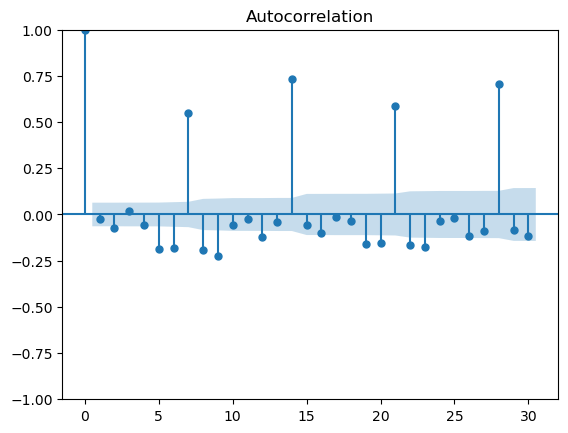

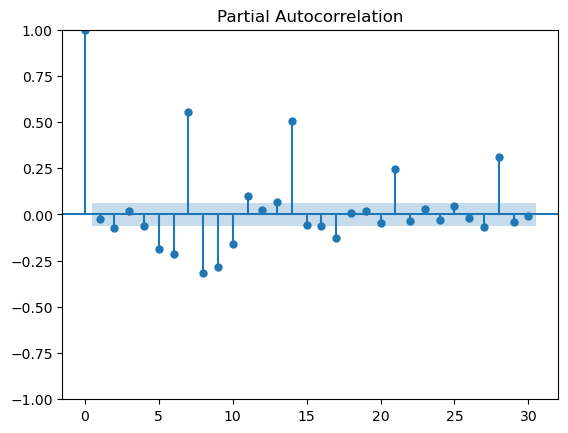

In [25]:
plot_acf(sales_data['Sales'])
plot_pacf(sales_data['Sales'])
plt.show()

#### *Interpretation*

*Autocorrelation Function (ACF):* The ACF plot shows the autocorrelation of the differenced sales data at different lags. A lag is the number of time points between each observation and its comparison point. In this plot, we observe significant autocorrelation at lags 7, 14, 21 & 28, indicated by the correlation values being above the significance threshold (usually represented by dashed lines). This suggests that there is a seasonal pattern present in the data, with peaks in autocorrelation occurring every 7,14,21,& 28 time periods.

*Partial Autocorrelation Function (PACF):* The PACF plot shows the partial autocorrelation of the differenced sales data at different lags. The partial autocorrelation at a particular lag represents the correlation between observations separated by that lag after removing the effects of shorter lags. In this plot, significant partial autocorrelation is observed at lags 6 and 13, indicating that these lags have a direct influence on the current observation, without the influence of shorter lags.

#### *Analysis*

* The ACF plot suggests a seasonal pattern in the data, with significant autocorrelation at lags 7,14,21 & 28, indicating weekly and bi-weekly seasonality, respectively.

* The PACF plot identifies specific lags that have a direct influence on the current observation, with significant partial autocorrelation observed at lags 7,14,21 & 28.

#### *Conclusion*

* The presence of significant autocorrelation at lags 7,14,21,& 28in the ACF plot suggests that there is a seasonal pattern in the data, which should be considered in modeling and forecasting.

* The significant partial autocorrelation at lags 7,14,21 & 28 in the PACF plot indicates that these lags have a direct influence on the current observation, suggesting potential AR (AutoRegressive) terms in the model.

* Understanding the autocorrelation and partial autocorrelation functions helps in selecting appropriate parameters for time series models, such as ARIMA (AutoRegressive Integrated Moving Average), which can effectively capture the underlying patterns and dynamics in the data.

#### Check for stationary by Augmented Dickey-Fuller test

In [26]:
result = sm.tsa.stattools.adfuller(sales_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:',result[4])

ADF Statistic: -4.7616145245956165
p-value: 6.436731330559263e-05
Critical Values: {'1%': -3.437470108019385, '5%': -2.8646832620852853, '10%': -2.5684436698650503}


#### *Interpretation*

*ADF Statistic:* The ADF (Augmented Dickey-Fuller) statistic is -4.7616. This value is used to determine the stationarity of the time series data. In this case, the ADF statistic is negative, indicating that the time series data may be stationary.

*p-value:* The p-value associated with the ADF statistic is approximately 6.44e-05. This p-value is significantly less than commonly used significance levels (such as 0.05 or 0.01). Therefore, there is strong evidence against the null hypothesis (the time series is non-stationary), suggesting that the data is likely stationary.

*Critical Values:* The critical values are thresholds used to interpret the ADF statistic. They represent the values at which the null hypothesis can be rejected with a certain level of confidence. In this case:

1% Critical Value: -3.4375
5% Critical Value: -2.8647
10% Critical Value: -2.5684

Since the ADF statistic is more negative than all these critical values, we can reject the null hypothesis at any commonly used significance level. This further supports the conclusion that the data is likely stationary.

#### *Analysis*

* The low p-value indicates strong evidence against the null hypothesis of non-stationarity, suggesting that the time series data is likely stationary.

* The ADF statistic being more negative than the critical values at all common significance levels further supports the conclusion of stationarity.

#### *Conclusion*

* Based on the ADF test results, there is strong evidence to suggest that the sales data is stationary.

* Stationarity is an important property for time series analysis as it allows for more reliable forecasting and modeling.

* However, further analysis and validation may be required to ensure the robustness of the stationarity conclusion and to explore other aspects of the data's behavior.

##### Model Fitting

In [27]:
sarima_model = SARIMAX(sales_data['Sales'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))  
sarima_result = sarima_model.fit()

c:\Users\pooji\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [28]:
forecast_steps = 30 
forecast = sarima_result.forecast(steps=forecast_steps)

In [29]:
actual_values = sales_data['Sales'][-forecast_steps:]
mse = mean_squared_error(actual_values, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 20240009704837.516


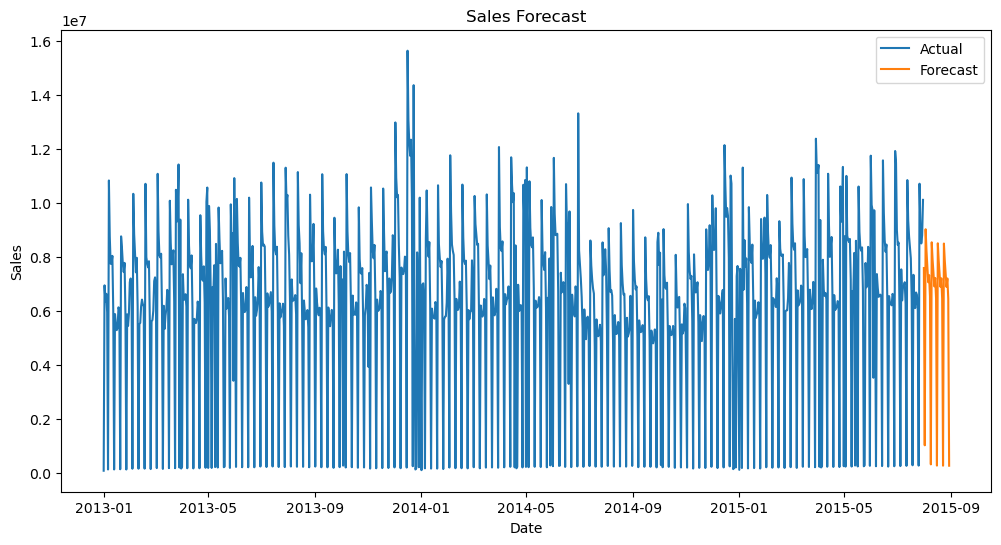

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Sales'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### *Interpretation*

The SARIMA model has been used to generate a forecast for sales data for a future period starting from the end of the available data. In this case, a forecast has been made for 30 steps ahead. The forecasted values are then plotted against the actual sales data to visualize the forecasted trend.

#### *Analysis*

* The SARIMA model has generated a forecast for sales data for the future period, providing insights into the expected trend in sales based on historical patterns captured by the model.

* The forecasted values appear to align with the overall trend of the actual sales data, indicating that the SARIMA model has captured the underlying patterns and dynamics in the data reasonably well.

* However, the forecasted values exhibit some level of uncertainty, as indicated by the range provided for the forecasted sales values.

#### *Conclusion*

* The SARIMA model provides a useful tool for generating forecasts of future sales based on historical data patterns.

* The forecasted values provide valuable insights into the expected trend in sales for the future period, allowing businesses to make informed decisions and plan accordingly.

* While the forecasted values align with the overall trend of the actual sales data, it's essential to consider the uncertainty associated with the forecasted values and incorporate this uncertainty into decision-making processes. Additional analysis and validation, such as assessing forecast accuracy metrics and conducting sensitivity analyses, may further enhance the reliability and usefulness of the forecasted values.